In [1]:
# importing libraries
import pandas as pd

In [2]:
# loading the data
data = pd.read_csv(r"C:\Users\simru\Desktop\Duke_Datathon\final_df_modelling.csv")
print(data.shape)
data.head(2)

(5498, 108)


,Unnamed: 0,hadm_id_x,emar_id,subject_id,emar_charttime,dose_given,vanco_lab_mean_next48h,creat_charttime,creat,aki_stage_creat,...,temperature_min_48,dbp_ni_max_48,dbp_ni_min_48,mbp_max_48,mbp_min_48,sbp_ni_max_48,sbp_ni_min_48,mbp_ni_max_48,mbp_ni_min_48,urineoutput_48
0,2,20011505.0,14104652-131,14104652,2158-05-20 10:53:00,1000.0,5.2,2158-05-20 12:10:00,1.2,2,...,36.87,82.0,61.0,96.0,67.0,138.0,98.0,96.0,70.0,605.0
1,15,20024229.0,16779215-127,16779215,2132-08-30 17:17:00,1500.0,17.8,2132-08-31 14:50:00,0.6,0,...,37.00,63.0,44.0,81.0,58.0,144.0,103.0,81.0,58.0,3561.0


In [3]:
# For numerical columns, fill missing values with column mean
import numpy as np

num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# For categorical columns, fill missing values with column mode
cat_cols = data.select_dtypes(include=["object"]).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [4]:
data.columns = data.columns.map(str)

In [5]:
import numpy as np

data["aki_stage_creat"] = np.where(data["aki_stage_creat"] == 0, "normal", "abnormal")
data["aki_stage_creat"] = np.where(data["aki_stage_creat"] == "normal", 0, 1)

In [6]:
data["aki_stage_creat"].value_counts()

0    3231
1    2267
Name: aki_stage_creat, dtype: int64

In [7]:
data = data.drop(data.columns[-1], axis=1)

In [8]:
data = data.drop(
    ["vanco_lab_mean_next48h_48", "Unnamed: 0", "index_x_48", "index_x", "index_y"],
    axis=1,
)

In [9]:
# check different value counts in race column
def categorize_race(race):
    if "WHITE" in race:
        return "WHITE"
    elif "BLACK" in race:
        return "BLACK"
    elif "HISPANIC" in race:
        return "HISPANIC"
    else:
        return "OTHER"


# Assuming df is your DataFrame and 'race' is the column with the race information
data["race"] = data["race"].apply(categorize_race)

data["race"].value_counts()

WHITE       3270
OTHER       1513
BLACK        487
HISPANIC     228
Name: race, dtype: int64

In [10]:
# drop from data aki_stage_creat
data = data.drop(["aki_stage_creat_48"], axis=1)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

X = data.drop("aki_stage_creat", axis=1)
y = data["aki_stage_creat"]
groups = data["subject_id"]

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the indices for the training and test sets
train_idx, test_idx = next(gss.split(X, y, groups))

# Create the training and test sets
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [12]:
# remove all the variables containing "_id" and "time"
X_train = X_train.drop(X_train.filter(regex="_id").columns, axis=1)
X_train = X_train.drop(X_train.filter(regex="time").columns, axis=1)
X_test = X_test.drop(X_test.filter(regex="_id").columns, axis=1)
X_test = X_test.drop(X_test.filter(regex="time").columns, axis=1)

In [13]:
# remove admission_type_48, insurance_48, language_48, marital_status_48, race_48, gender_48
drop_columns = [
    "admission_type_48",
    "insurance_48",
    "language_48",
    "marital_status_48",
    "race_48",
    "vanco_lab_mean_next48h",
    "hospital_expire_flag",
    "los_hospital",
    "Unnamed: 0_48",
    "kdigo_emar_diff_hr_48",
    "hospital_expire_flag_48",
    "los_hospital_48",
    "index_y_48",
    "kdigo_emar_diff_hr",
]
X_train = X_train.drop(drop_columns, axis=1)
X_test = X_test.drop(drop_columns, axis=1)

In [14]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [15]:
X_train.columns

Index(['dose_given', 'creat', 'admission_age', 'respiration_24hours',
       'coagulation_24hours', 'liver_24hours', 'cardiovascular_24hours',
       'cns_24hours', 'renal_24hours', 'sofa_24hours', 'heart_rate_max',
       'heart_rate_min', 'sbp_max', 'sbp_min', 'glucose_max', 'glucose_min',
       'temperature_max', 'temperature_min', 'dbp_ni_max', 'dbp_ni_min',
       'mbp_max', 'mbp_min', 'sbp_ni_max', 'sbp_ni_min', 'mbp_ni_max',
       'mbp_ni_min', 'urineoutput', 'days', 'dose_given_48', 'creat_48',
       'admission_age_48', 'respiration_24hours_48', 'coagulation_24hours_48',
       'liver_24hours_48', 'cardiovascular_24hours_48', 'cns_24hours_48',
       'renal_24hours_48', 'sofa_24hours_48', 'heart_rate_max_48',
       'heart_rate_min_48', 'sbp_max_48', 'sbp_min_48', 'glucose_max_48',
       'glucose_min_48', 'temperature_max_48', 'temperature_min_48',
       'dbp_ni_max_48', 'dbp_ni_min_48', 'mbp_max_48', 'mbp_min_48',
       'sbp_ni_max_48', 'sbp_ni_min_48', 'mbp_ni_max_48', 

In [16]:
# modeling
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Fit the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
log_predictions = log_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, log_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.653114186851211


c:\Users\simru\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


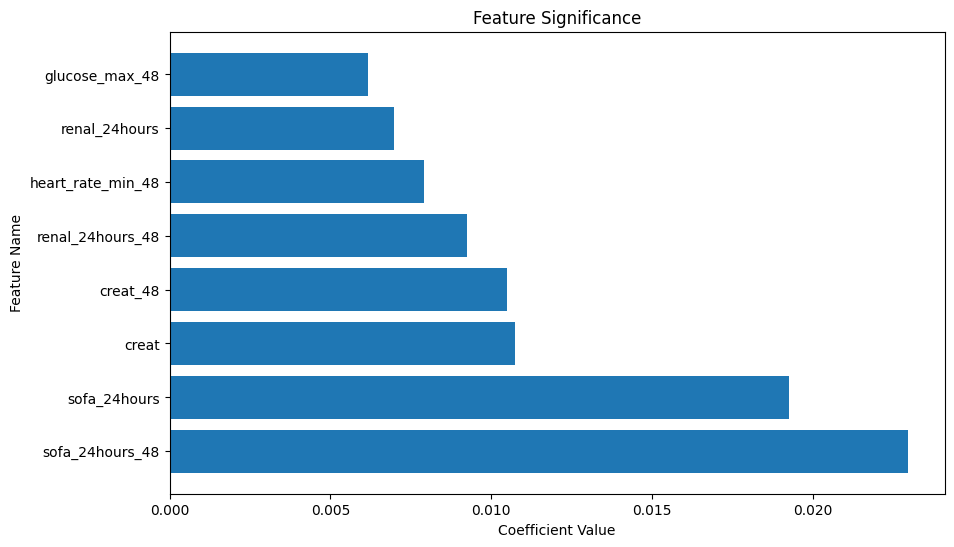

In [17]:
# Get feature names
feature_names = X_train.columns

# Get the importance of features
importance = log_model.coef_[0]

# Combine feature names and their importance into a DataFrame
feature_importance = pd.DataFrame({"feature": feature_names, "importance": importance})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values("importance", ascending=False)

# Select top 8 features
top_features = feature_importance.head(8)

# Plot significance of top 8 features
plt.figure(figsize=(10, 6))
plt.barh(top_features["feature"], top_features["importance"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Significance")
plt.show()

AUC Score: 0.7005346703622566


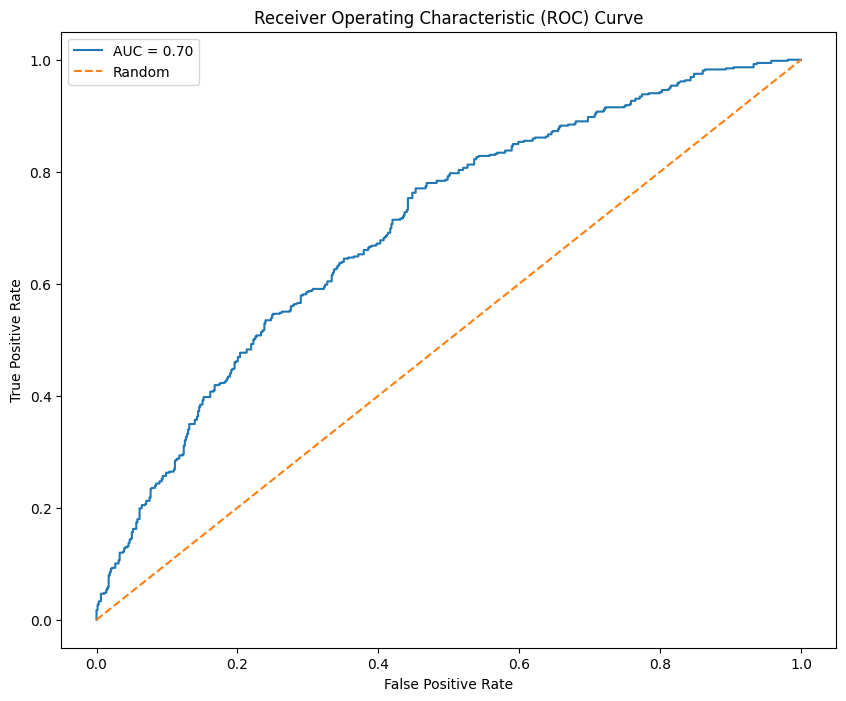

In [18]:
# Calculate probabilities for the positive class
log_probs = log_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, log_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, log_probs)
print(f"AUC Score: {auc_score}")

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()